# MEAN SHIFT

# Setup
Let us import the required modules.

In [2]:
from src.utilities.dataset import load_data
from src.models.clustering import MeanShiftEvaluation
# from src.models.dataset import DataClusterSplit

## Load Data


In [3]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv 
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv 


[Length: 14000; Features: 784]

## Tuning

In [3]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    hyperparam_vals=[0.1, 0.3, 0.5, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 100.0]
)

mean_shift_evaluation

MeanShiftEvaluation [n_components: [2, 10, 30, 50, 100, 120, 150, 200], kernel-size: [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], not evaluated]

In [4]:
%%time
mean_shift_evaluation.evaluate()

Processing number of components: 2 
  > Processed kernel-size: 0.05 [502.34743 s] 
  > Processed kernel-size: 0.1 [384.46002 s] 
  > Processed kernel-size: 0.2 [507.60187 s] 
  > Processed kernel-size: 0.3 [191.23471 s] 
  > Processed kernel-size: 0.4 [82.26504 s] 
  > Processed kernel-size: 0.5 [59.81998 s] 
  > Processed kernel-size: 0.6 [48.26760 s] 
Processing number of components: 10 
  > Processed kernel-size: 0.05 [15.39319 s] 
  > Processed kernel-size: 0.1 [26.01564 s] 
  > Processed kernel-size: 0.2 [142.61195 s] 
  > Processed kernel-size: 0.3 [310.96847 s] 
  > Processed kernel-size: 0.4 [346.61624 s] 
  > Processed kernel-size: 0.5 [195.05970 s] 
  > Processed kernel-size: 0.6 [137.60949 s] 
Processing number of components: 30 
  > Processed kernel-size: 0.05 [37.17808 s] 
  > Processed kernel-size: 0.1 [38.70392 s] 
  > Processed kernel-size: 0.2 [52.28695 s] 
  > Processed kernel-size: 0.3 [99.79586 s] 
  > Processed kernel-size: 0.4 [196.23052 s] 
  > Processed kernel-s

In [5]:
mean_shift_evaluation.best_model

MeanShift[N-rows: 14000; N-components: 50; Score: 0.9061353055830519, N-clusters: 6074] [KernelSize: 0.6] 

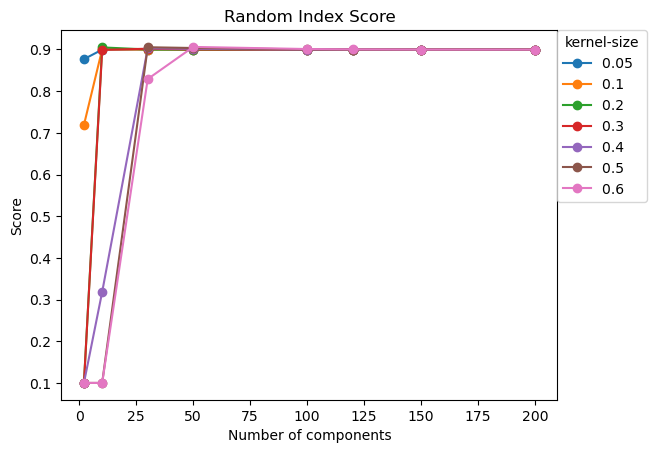

In [6]:
mean_shift_evaluation.plot_score(save=True, file_name="meanshift_score")

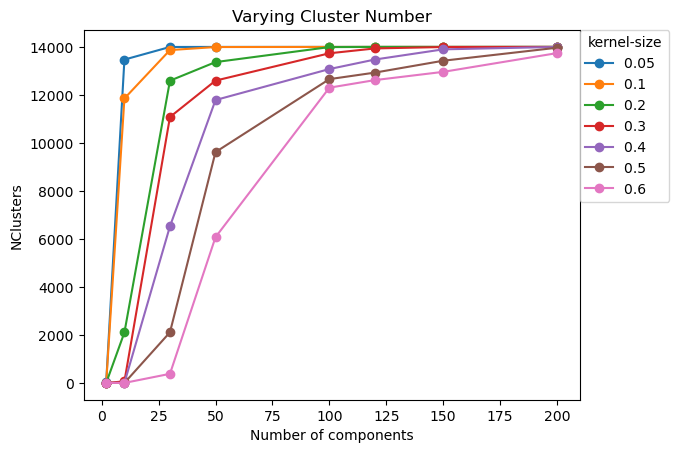

In [7]:
mean_shift_evaluation.plot_n_clusters(save=True, file_name="meanshift_clusters")

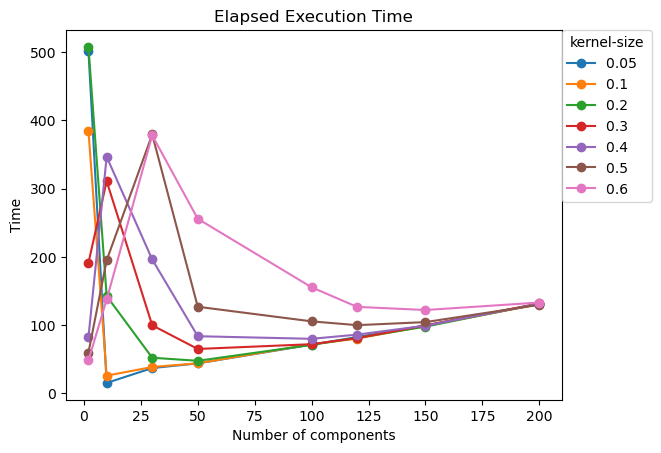

In [8]:
mean_shift_evaluation.plot_time(save=True, file_name="meanshift_exec_time")

## Best model

In [4]:
best = mean_shift_evaluation.best_model
best

MeanShift[N-rows: 14000; N-components: 50; Score: 0.9062438031287949, N-clusters: 6054] [KernelSize: 0.6] 

In [6]:
clusters = DataClusterSplit(data=data, index=best.out)

In [7]:
clusters

ClusterDataSplit [Data: 14000, Clusters: 6054, Mean-per-Cluster: 2.313, Score: 0.906] 

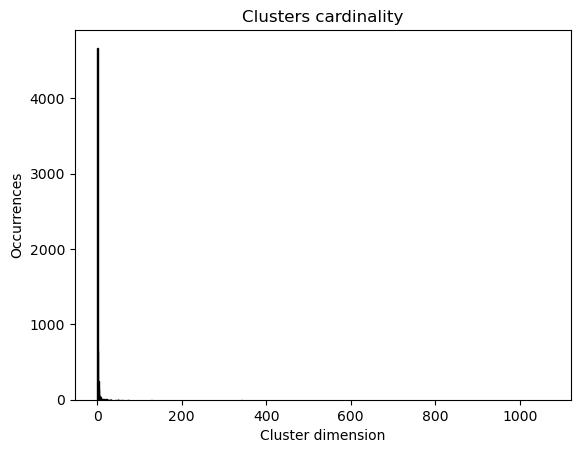

In [8]:
clusters.plot_frequencies_histo()

In [9]:
clusters_best = clusters.get_sub_clusters(a=25)

In [10]:
clusters_best

ClusterDataSplit [Data: 4187, Clusters: 49, Mean-per-Cluster: 85.449, Score: 0.887] 

In [11]:
clusters_best.rand_index_score

0.8868416347051045

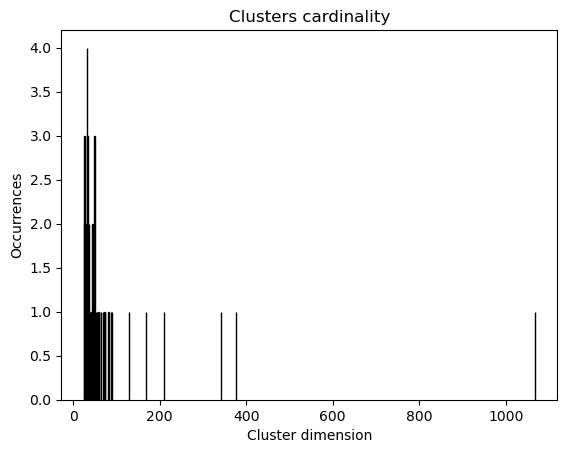

In [12]:
clusters_best.plot_frequencies_histo()

In [ ]:
clusters_best.plot_mean_digit()
# output stra lunghi porcodio

In [14]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [15]:
clusters_bad

ClusterDataSplit [Data: 4669, Clusters: 4669, Mean-per-Cluster: 1.000, Score: 0.854] 

In [ ]:
clusters_bad.plot_mean_digit(sample_out=500)
# output stra lunghi porcodio